# Initial Prep
## Importing Data and Libraries

In [29]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.dates as mdates
from collections import Counter
df = pd.read_csv('Cleaned_Amazon_Sales_Data.csv')
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121171,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,False
121172,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,False
121173,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,False
121174,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350,IN,False


## Customer Segmentation by order frequency

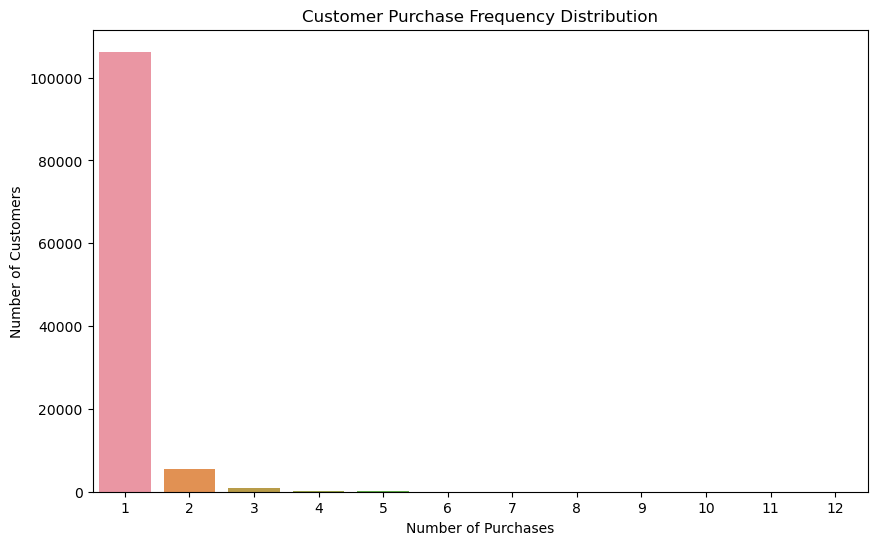

In [23]:
customer_frequency = df['Order ID'].value_counts().reset_index()
customer_frequency.columns = ['Order ID', 'Frequency']

frequency_distribution = customer_frequency['Frequency'].value_counts().reset_index()
frequency_distribution.columns = ['Frequency', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Count', data=frequency_distribution)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

### Customer Purchase Frequency Distribution
#### Findings and Insights
According to the bar most of the customers have bought ones and their are not much recurring customers<br>

#### Recommendation
**Benefit customers on purchases**: Introduce discount on purchases after a purchase has been made to get recurring customers<br>

## Average order Valye by Customers

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


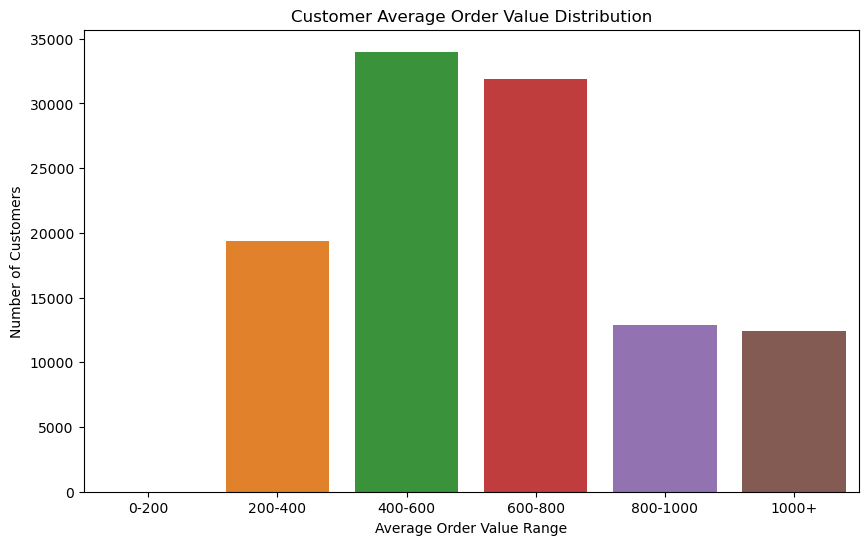

In [28]:
avg_order_value = df.groupby('Order ID')['Amount'].mean().reset_index()
avg_order_value.columns = ['Order ID', 'Average Order Value']

# Bin the average order values into ranges
avg_order_value['Value Range'] = pd.cut(avg_order_value['Average Order Value'],
                                        bins=[0, 200, 400, 600, 800, 1000, float('inf')],
                                        labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+'])

# Aggregate by value range
value_range_counts = avg_order_value['Value Range'].value_counts().reset_index()
value_range_counts.columns = ['Value Range', 'Count']

# Plot the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='Value Range', y='Count', data=value_range_counts)
plt.title('Customer Average Order Value Distribution')
plt.xlabel('Average Order Value Range')
plt.ylabel('Number of Customers')
plt.show()

### Customer Average Order Value Distribution
#### Findings and Insights
According to the bar most of the customers have bought items from 400 to 600 <br>
Following that we have customers buying most in 600 to 800<br>
Customers tend to buy products which are reasonably priced and have good price to performance ratio

#### Recommendation
**Improve product quality with low prices**: Try offering better quality products at lower price point which will increase overall sales<br>
**Decrease stocks on high value products** : Decrease stock of high value products or import them to inventory base on order>